<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Outsiders/blob/main/Gino_Outsider_Advantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

df = pd.read_excel("/content/2024-02-22_Columbia_ProfMeta.xlsx")

df.head()

,Name,Rank,Department,Citation,Phd_School,PhD_Major,MA_School,MA_Major,BA_School,BA_Major,BA_Country,USA or Not
0,Mabel Abraham,Associate,Management Division,471.0,MIT,Management,NaN,NaN,Providence College,Mathematics,USA,USA
1,Eric Abrahamson,Full,Management Division,21255.0,NYU,Management,NaN,NaN,Haverford College,"Sociology, Anthropology and Philosophy",USA,USA
2,Modupe Akinola,Full,Management Division,4097.0,Harvard,Orgnizational Behavior,NaN,NaN,Harvard,Psychology,USA,USA
3,Daniel Ames,Full,Management Division,NaN,Berkeley,Social and Personality Psychology,NaN,NaN,Beloit College,English and Economics,USA,USA
4,Joel Brockner,Full,Management Division,34632.0,Tufts,Personality and social psychology,NaN,NaN,SUNY,Psychology,UAS,Non-USA


In [44]:
df["Department"].replace("NaN", "", inplace=True)
df["PhD_Major"].replace("NaN", "", inplace=True)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              106 non-null    object 
 1   Rank              106 non-null    object 
 2   Department        106 non-null    object 
 3   Citation          87 non-null     float64
 4   Phd_School        104 non-null    object 
 5   PhD_Major         106 non-null    object 
 6   MA_School         34 non-null     object 
 7   MA_Major          32 non-null     object 
 8   BA_School         101 non-null    object 
 9   BA_Major          99 non-null     object 
 10  BA_Country        102 non-null    object 
 11  USA or Not        102 non-null    object 
 12  Similarity_SpaCy  106 non-null    float64
dtypes: float64(2), object(11)
memory usage: 10.9+ KB


In [45]:
df.head()

,Name,Rank,Department,Citation,Phd_School,PhD_Major,MA_School,MA_Major,BA_School,BA_Major,BA_Country,USA or Not
0,Mabel Abraham,Associate,Management Division,471.0,MIT,Management,NaN,NaN,Providence College,Mathematics,USA,USA
1,Eric Abrahamson,Full,Management Division,21255.0,NYU,Management,NaN,NaN,Haverford College,"Sociology, Anthropology and Philosophy",USA,USA
2,Modupe Akinola,Full,Management Division,4097.0,Harvard,Orgnizational Behavior,NaN,NaN,Harvard,Psychology,USA,USA
3,Daniel Ames,Full,Management Division,NaN,Berkeley,Social and Personality Psychology,NaN,NaN,Beloit College,English and Economics,USA,USA
4,Joel Brockner,Full,Management Division,34632.0,Tufts,Personality and social psychology,NaN,NaN,SUNY,Psychology,UAS,Non-USA


1 means the vectors are identical in orientation (i.e., the angle between them is 0°).
0 indicates orthogonality (i.e., the vectors are independent or not similar at all, with a 90° angle between them).
-1 means the vectors are diametrically opposed (i.e., the angle between them is 180°).

In [6]:
! pip install Spacy
! pip install spacy-llm

In [7]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [46]:
import spacy
import pandas as pd

df['Department'].fillna('', inplace=True)
df['Department'] = df['Department'].str.replace("Division", "")
df['PhD_Major'].fillna('', inplace=True)

# Load SpaCy model: en_core_web_lg or _sm
nlp = spacy.load('en_core_web_lg')  # or any other model

# Vectorize texts and calculate similarity
# Here, we directly use SpaCy's similarity method, which averages word vectors for text
df['Similarity_SpaCy'] = df.apply(lambda row: nlp(str(row['Department'])).similarity(nlp(str(row['PhD_Major']))), axis=1)


<ipython-input-46-d864ddb29161>:13: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df['Similarity_SpaCy'] = df.apply(lambda row: nlp(str(row['Department'])).similarity(nlp(str(row['PhD_Major']))), axis=1)


In [47]:
df["Similarity_SpaCy"].describe()

count    106.000000
mean       0.742949
std        0.254187
min        0.000000
25%        0.618097
50%        0.724988
75%        1.000000
max        1.000000
Name: Similarity_SpaCy, dtype: float64

In [49]:
df[df["Similarity_SpaCy"]==0]

,Name,Rank,Department,Citation,Phd_School,PhD_Major,MA_School,MA_Major,BA_School,BA_Major,BA_Country,USA or Not,Similarity_SpaCy
11,Kathryn Harrigan,Full,Management,16383.0,Harvard,,University of Texas Austin,NaN,Macalester College,NaN,USA,USA,0.0
16,Soomi Kim,Assistant,Management,26.0,MIT,,NaN,NaN,Wellesley College,Economics and English,USA,USA,0.0
17,Bruce Kogut,Full,Management,91477.0,MIT,,Columbia,International Affairs,Berkely,Political Science,USA,USA,0.0
34,Awi Federgruen,Full,"Decision, Risk, and Operations",NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0
68,Matthias Breuer,Associate,Accounting,566.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,Kent Daniel,Full,Finance,25048.0,UCLA,,NaN,NaN,California Institute of Technology,Physics,USA,USA,0.0


In [50]:
df1 = df[df["Similarity_SpaCy"]!=0]

In [71]:
df1["Department"] = df1["Department"].str.strip()

<ipython-input-71-fcfd6fd18e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Department"] = df1["Department"].str.strip()


In [72]:
df1["Department"].value_counts()

Management                        26
Finance                           25
Marketing                         20
Decision, Risk, and Operations    15
Accounting                        12
Dean's Office                      1
Economics                          1
Name: Department, dtype: int64

In [76]:
df1[df1["Department"] == "Management"].sort_values(by="Similarity_SpaCy", ascending=False)

,Name,Rank,Department,Citation,Phd_School,PhD_Major,MA_School,MA_Major,BA_School,BA_Major,BA_Country,USA or Not,Similarity_SpaCy,Group
0,Mabel Abraham,Associate,Management,471.0,MIT,Management,NaN,NaN,Providence College,Mathematics,USA,USA,1.000000,Insider
1,Eric Abrahamson,Full,Management,21255.0,NYU,Management,NaN,NaN,Haverford College,"Sociology, Anthropology and Philosophy",USA,USA,1.000000,Insider
28,Lori Yue,Associate,Management,NaN,Columbia,Management,Peking University,Economics,Renmin University of China,Economics,China,Non-USA,1.000000,Insider
10,Jorge Guzman,Associate,Management,1545.0,MIT,Entrepreneurship and Strategic Management,NaN,NaN,Instituto Tecnol?gico y de Estudios Superiores...,Computer Engineering,Mexico,Non-USA,0.856049,Insider
25,Adina D. Sterling,Associate,Management,796.0,Emory,Organization and Management,NaN,NaN,Ohio State University,Cheminal Engineering and Economics,USA,USA,0.842431,Insider
15,Daniel Keum,Associate,Management,322.0,NYU,Management and Organizations,NaN,NaN,Dartmouth,Economics and Mathmatics,USA,USA,0.837104,Insider
23,Rebecca Ponce de Leon,Assistant,Management,318.0,Duke,Management and Organizations,NaN,NaN,Duke,Psychology,USA,USA,0.837104,Insider
7,Bo Cowgill,Assistant,Management,2133.0,Berkeley,Business and Public Policy,NaN,NaN,Stanford,Public Policy,USA,USA,0.784242,Outsider
20,Michael Mauskapf,Assistant,Management,500.0,Northwestern; University of Michigan,Management and Organizations; Musicology,NaN,NaN,UPENN,Music,USA,USA,0.740670,Outsider
6,Vanessa Burbano,Associate,Management,3379.0,UCLA,Strategy,Princeton,Public Affairs,UPENN,Economics and International Relations,USA,USA,0.695841,Outsider


In [56]:
import numpy as np

df1["Group"] = np.where(df1["Similarity_SpaCy"] > 0.79, "Insider", "Outsider")

df1["Group"].value_counts()

<ipython-input-56-50e44ce9f315>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Group"] = np.where(df1["Similarity_SpaCy"] > 0.79, "Insider", "Outsider")


Outsider    54
Insider     46
Name: Group, dtype: int64

In [59]:
df1.groupby("Group")["Citation"].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Insider,35.0,4517.028571,6356.259835,22.0,372.5,1426.0,6155.0,28536.0
Outsider,47.0,13420.319149,22811.289758,24.0,1846.5,4035.0,13915.0,124939.0


In [61]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df1[df1["Group"]=="Insider"]["Citation"].dropna()
group2 = df1[df1["Group"]=="Outsider"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.5463214245171986, P-value: 0.013701804647766882


In [77]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df1[df1["USA or Not"]=="USA"]["Citation"].dropna()
group2 = df1[df1["USA or Not"]=="Non-USA"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.8547258849855729, P-value: 0.39635504777091246


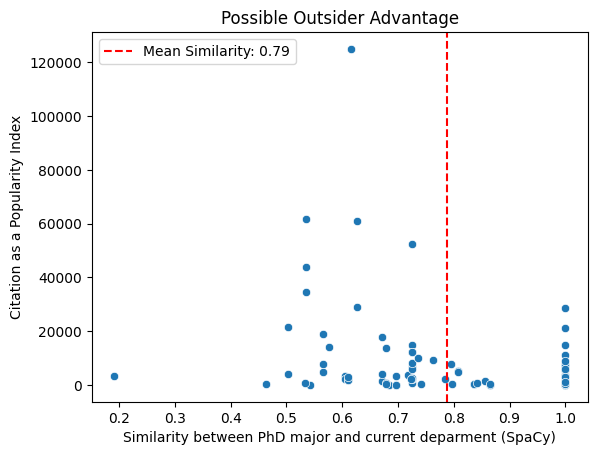

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df1, x="Similarity_SpaCy", y="Citation")

plt.title("Possible Outsider Advantage")
plt.xlabel("Similarity between PhD major and current deparment (SpaCy)")
plt.ylabel("Citation as a Popularity Index")

mean_similarity = df1['Similarity_SpaCy'].mean()
plt.axvline(x=mean_similarity, color='r', linestyle='--', label=f'Mean Similarity: {mean_similarity:.2f}')
plt.legend()

plt.savefig("Major Similarity and Citations.png")

plt.show()

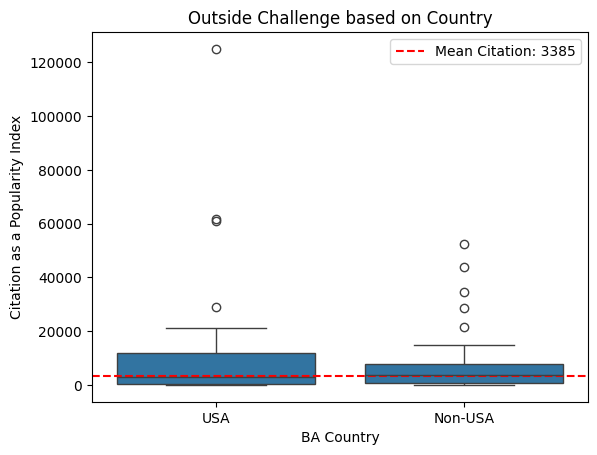

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df1, x="USA or Not", y="Citation")

plt.title("Outside Challenge based on Country")
plt.xlabel("BA Country")
plt.ylabel("Citation as a Popularity Index")

means = df1['Citation'].median()
plt.axhline(y=means, color='r', linestyle='--', label=f'Mean Citation: {means:.0f}')
plt.legend()


plt.savefig("Citations based on Country.png")

plt.show()

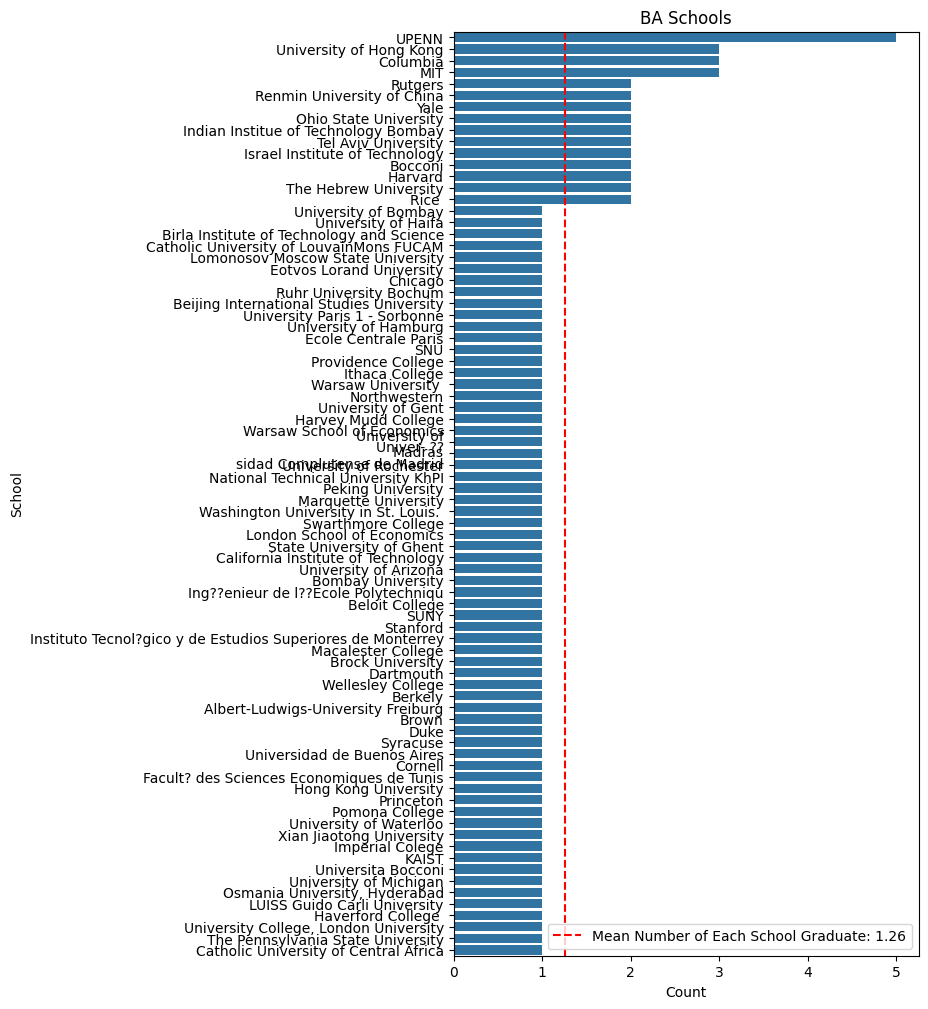

In [99]:
import seaborn as sns
import pandas as pd

school_counts = df['BA_School'].value_counts().reset_index()
school_counts.columns = ["School", "Count"]

plt.figure(figsize=(6,12))
sns.barplot(data=school_counts, y="School", x="Count")

mean = school_counts["Count"].mean()
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean Number of Each School Graduate: {mean:.2f}')
plt.legend()


plt.title("BA Schools")
plt.show()


2.702702702702703


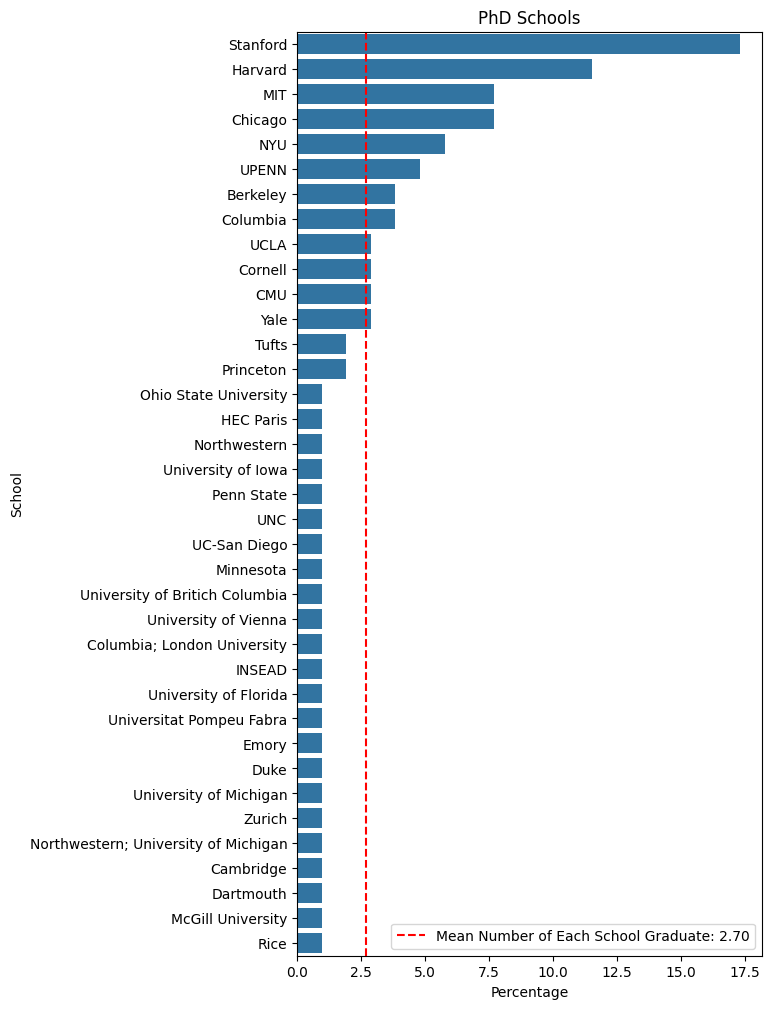

In [96]:

import seaborn as sns
import pandas as pd

school_counts = df['Phd_School'].value_counts(normalize=True).reset_index()
school_counts.columns = ["School", "Percentage"]

school_counts["Percentage"] = school_counts["Percentage"]*100

school_counts

plt.figure(figsize=(6,12))
sns.barplot(data=school_counts, y="School", x="Percentage")

plt.title("PhD Schools")

mean = school_counts["Percentage"].mean()
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean Number of Each School Graduate: {mean:.2f}')
plt.legend()


print(mean)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Vectorize the Department and PhD Major strings
vectorizer = CountVectorizer()
corpus = df['Department'].tolist() + df['PhD_Major'].tolist()  # Combine all texts to ensure vocabulary consistency
vectorizer.fit(corpus)  # Learn the vocabulary dictionary

# Transform texts to a document-term matrix
department_vectors = vectorizer.transform(df['Department'])
phd_major_vectors = vectorizer.transform(df['PhD_Major'])

# Calculate cosine similarity for each pair
similarity_scores = [cosine_similarity(department_vectors[i], phd_major_vectors[i])[0][0] for i in range(len(df))]

# Add similarity scores to the dataframe
df['Similarity'] = similarity_scores

In [ ]:
df.head(10)

,Name,Rank,Department,Citation,Phd_School,PhD_Major,MA_School,MA_Major,BA_School,BA_Major,BA_Country,Similarity,Similarity_SpaCy
0,Mabel Abraham,Associate,Management,471.0,MIT,Management,NaN,NaN,Providence College,Mathematics,USA,1.000000,1.000000
1,Eric Abrahamson,Full,Management,21255.0,NYU,Management,NaN,NaN,Haverford College,"Sociology, Anthropology and Philosophy",USA,1.000000,1.000000
2,Modupe Akinola,Full,Management,4097.0,Harvard,Orgnizational Behavior,NaN,NaN,Harvard,Psychology,USA,0.000000,0.575143
3,Daniel Ames,Full,Management,NaN,Berkeley,Social and Personality Psychology,NaN,NaN,Beloit College,English and Economics,USA,0.000000,0.348860
4,Joel Brockner,Full,Management,34632.0,Tufts,Personality and social psychology,NaN,NaN,SUNY,Psychology,UAS,0.000000,0.471414
5,Derek Brown,Assistant,Management,174.0,Berkeley,Management of Organizations,Portland State University,Industiral orgnizational psychology,Rice,Psychology,USA,0.577350,0.241423
6,Vanessa Burbano,Associate,Management,3379.0,UCLA,"Management, Strategy",Princeton,Public Affairs,UPENN,Economics and International Relations,USA,0.707107,0.477926
7,Bo Cowgill,Assistant,Management,2133.0,Berkeley,Business and Public Policy,NaN,NaN,Stanford,Public Policy,USA,0.000000,0.342548
8,Shai Davidai,Assistant,Management,1552.0,Cornell,Social and Personality Psychology,NaN,NaN,The hebrew university in jerusalem,Psychology and Cognitive Science,Israel,0.000000,0.348860
9,Adam Galinsky,Full,Management,60920.0,Princeton,Social Psychology,NaN,NaN,Harvard,Psychology,USA,0.000000,0.541043


In [ ]:
correlation = df[['Similarity_SpaCy', 'Similarity', 'Citation']].corr(method='pearson')

print(correlation)

                  Similarity_SpaCy  Similarity  Citation
Similarity_SpaCy          1.000000    0.684544  0.009952
Similarity                0.684544    1.000000 -0.127449
Citation                  0.009952   -0.127449  1.000000
